In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
fd_004 = pd.read_csv("/content/drive/MyDrive/ComputaciónAplicada/CMAPSS/train_FD004.txt",sep=" ",header=None)
print()

In [18]:
fd_004

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,NaN,NaN


In [20]:
fd_004.drop(columns=[26,27],inplace=True)

In [21]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB', 'htBleed','Nfdmd','PCNfR_dmd','W31','W32']

In [22]:
fd_004.columns = columns

In [23]:
fd_004

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nfdmd,PCNfR_dmd,W31,W32
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [24]:
def prepare_train_data(data, factor = 0):
# Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
 df = data.copy()

# Agrupar por 'unit_number' y encontrar el máximo 'time_in_cycles' para cada grupo
# reset_index() se usa para convertir 'unit_number' de un índice a una columna
 fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()

# Cambiar el nombre de la columna 'time_in_cycles' a 'max'
 fd_RUL.rename(columns = {'time_in_cycles':'max'}, inplace = True)

# Combinar el DataFrame original con fd_RUL basado en 'unit_number'
# Esto agrega la columna 'max' al DataFrame original
 df = df.merge(fd_RUL, on=['unit_number'], how='left')

# Calcular la columna 'RUL' como la diferencia entre 'max' y 'time_in_cycles'
 df['RUL'] = df['max'] - df['time_in_cycles']

# Eliminar la columna 'max' ya que ya no es necesaria
 df.drop(columns=['max'],inplace = True)

# Devolver solo las filas donde 'time_in_cycles' es mayor que el factor dado
 return df[df['time_in_cycles'] > factor]

In [25]:
df = prepare_train_data(fd_004)

In [26]:
df

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nfdmd,PCNfR_dmd,W31,W32,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,4
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,3
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,1


Text(0, 0.5, 'Cantidad de puntos')

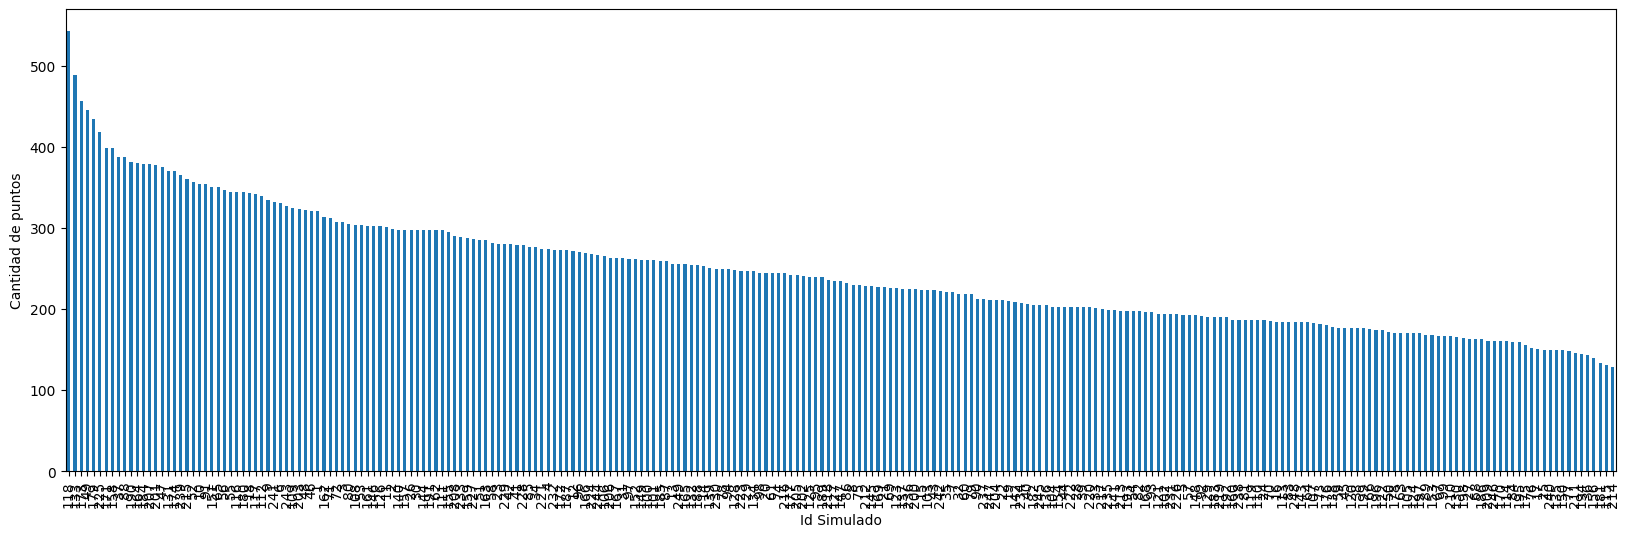

In [27]:
#Veamos cada campaña

plt.figure(figsize=(20,6))
df.unit_number.value_counts().plot.bar()
plt.xlabel('Id Simulado')
plt.ylabel('Cantidad de puntos')

In [28]:
 # Definimos la variable dependiente que queremos analizar. En este caso, 'RUL' (Remaining Useful Life).
dependent_var = ['RUL']

# Creamos un gráfico de dispersión (scatter plot) utilizando PairGrid de seaborn.
# Se filtran los datos para considerar solo las unidades con 'unit_number' menor a 100.
# Los gráficos de dispersión se crearán para cada variable (columnas) en el DataFrame 'df', utilizando 'RUL' como la variable en el eje x.
 g = sns.PairGrid(data=df.query('unit_number < 100'),

             # Filtramos los datos para unidades menores a 100
            x_vars=dependent_var, # Variable independiente 'RUL'
            y_vars=df.columns, # Columnas del DataFrame a comparar contra 'RUL'
            hue="unit_number", # Coloreamos los puntos según el 'unit_number'
            height=2, # Altura de cada gráfico
            aspect=5) # Relación de aspecto para los gráficos

# Utilizamos la función map para dibujar gráficos de dispersión en la cuadrícula (PairGrid).
 g = g.map(plt.scatter)

# Ajustamos los límites del eje x, invirtiendo la dirección del eje para mostrar de 60 a 0.
 g = g.set(xlim=(60, 0))

# Agregamos una leyenda para diferenciar las distintas unidades por color.
 g = g.add_legend()

Output hidden; open in https://colab.research.google.com to view.

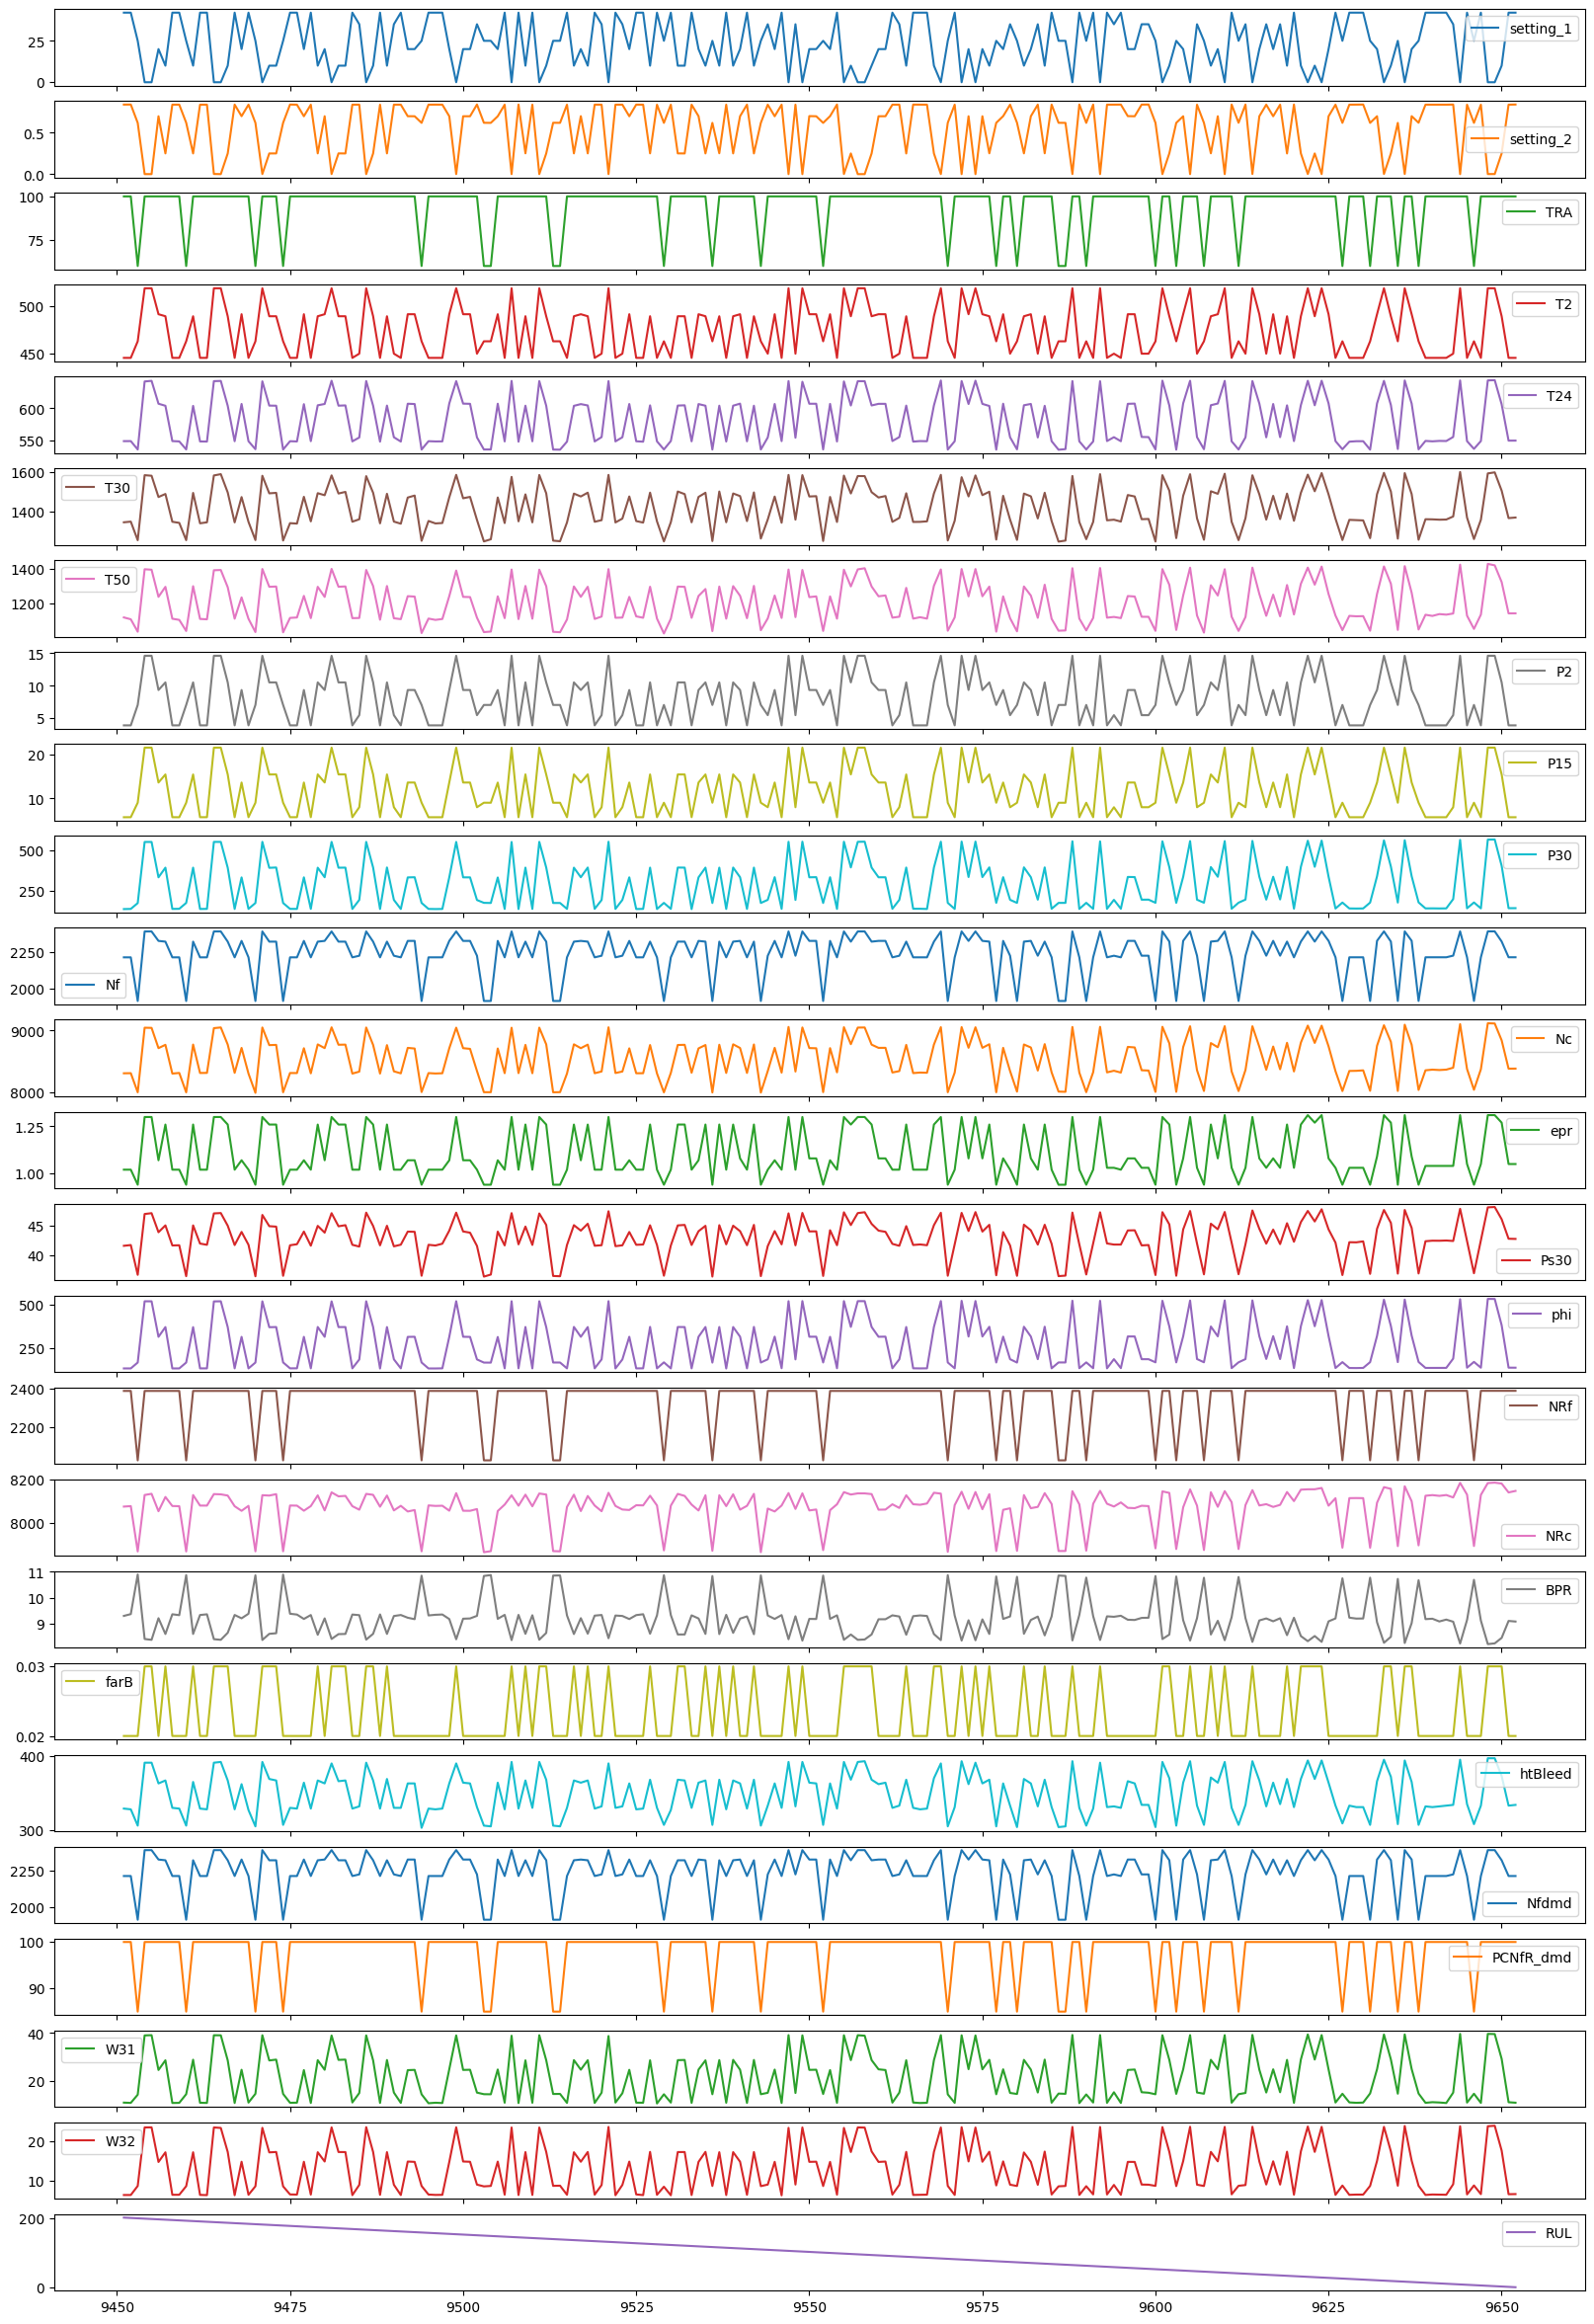

In [29]:
### Ver cada sensor por motor ###

# Filtramos los datos para obtener solo aquellos correspondientes al motor con 'unit_number' igual a 39.
engine_id = df[df['unit_number'] == 39]

# Graficamos todas las columnas (sensores) del DataFrame filtrado (excepto las dos primeras columnas) para el motor específico.
# Usamos subplots para crear un gráfico separado por cada sensor, compartiendo el eje x para todos los gráficos.
# Se define un tamaño de figura grande para asegurar que los gráficos sean legibles.
ax1 = engine_id[df.columns[2:]].plot(subplots=True, sharex=True, figsize=(20,30))

/tmp/ipython-input-30-199401640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subset_stats.index, y=subset_stats["std"], palette='magma')
/tmp/ipython-input-30-199401640.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


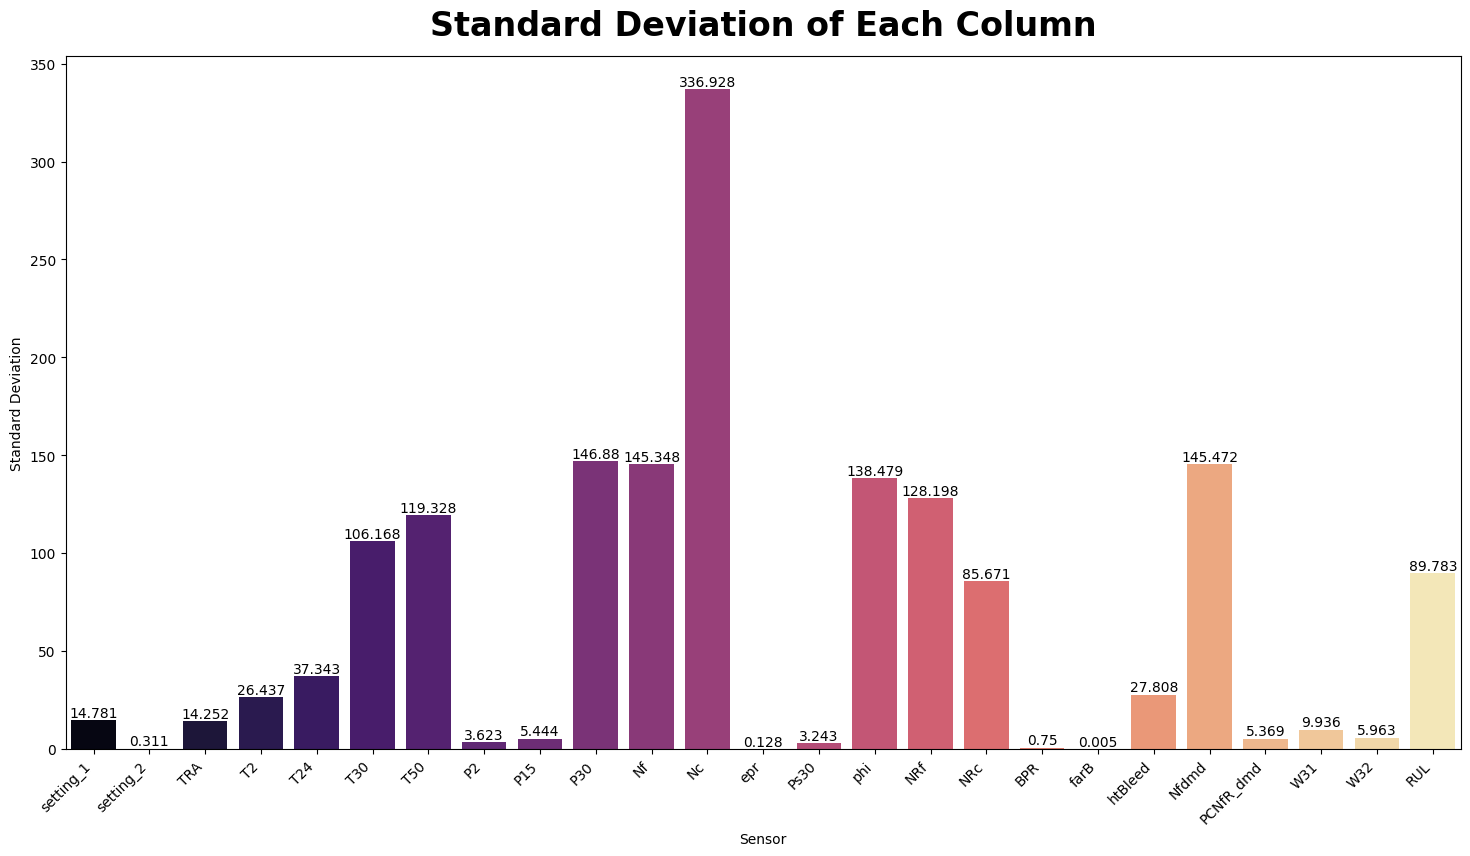

In [30]:
# Configuramos el tamaño de la figura para que sea lo suficientemente grande para visualizar todos los sensores.
plt.figure(figsize=(18, 9))

# Calculamos las estadísticas descriptivas (media y desviación estándar) de todas las columnas del DataFrame `df`.
# Usamos .loc[['mean', 'std']] para obtener solo las filas de la media y desviación estándar.
# La transponemos (.T) para que las columnas sean los sensores y filtramos desde la tercera columna en adelante [2:] para ignorar las dos primeras columnas que no corresponden a sensores.
subset_stats = df.describe().loc[['mean', 'std']].T[2:]

# Creamos un gráfico de barras para mostrar la desviación estándar de cada columna (sensor).
# Usamos la paleta 'magma' para dar color a las barras.
ax = sns.barplot(x=subset_stats.index, y=subset_stats["std"], palette='magma')

# Ajustamos las etiquetas del eje x (los nombres de los sensores) para que se roten 45 grados y se alineen a la derecha para mayor legibilidad.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

# Agregamos anotaciones a cada barra del gráfico, mostrando el valor de la desviación estándar con 3 decimales.
for p in ax.patches:
 ax.annotate(str(round(p.get_height(), 3)), # Texto que muestra la desviación estándar redondeada a 3 decimales
(p.get_x() + p.get_width() / 2., p.get_height()), # Posición del texto centrado sobre la barra
ha='center', va='center', fontsize=10, color='black', # Alineación y estilo del texto
xytext=(0, 5), textcoords='offset points') # Desplazamiento del texto hacia arriba de la barra

# Mostramos el gráfico
plt.show()

In [ ]:
import pandas as pd

# Ejemplo: DataFrame de prueba
data = {'Nombre': ['Juan', 'Ana', 'Luis'],
        'Edad': [25, 30, 35]}
df = pd.DataFrame(data)

# Ruta específica en tu Drive (asegúrate de que la carpeta exista)
ruta_en_drive = '/content/drive/MyDrive/mi_carpeta/mi_archivo.csv'

# Guardar el DataFrame como CSV
df.to_csv(ruta_en_drive, index=False)  # index=False evita una columna adicional de índices